## Autoenkoder odszumiający

In [1]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

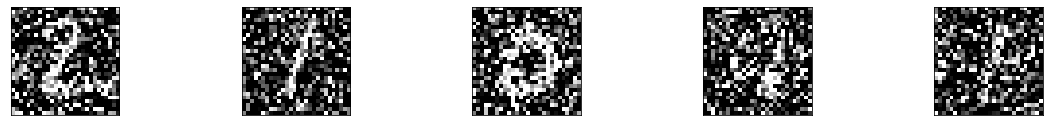

In [4]:
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
encoder = Sequential()
decoder=Sequential()
# enkoder
encoder.add(Conv2D(15, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
encoder.add(MaxPooling2D(2, padding= 'same'))
encoder.add(Conv2D(30, 3, activation= 'relu', padding='same'))
encoder.add(MaxPooling2D(2, padding= 'same'))
#dekoder
decoder.add(Conv2D(15, 3, activation= 'relu', padding='same'))
decoder.add(UpSampling2D(2))
decoder.add(Conv2D(30, 3, activation= 'relu', padding='same'))
decoder.add(UpSampling2D(2))
decoder.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # wyjscie
#decoder.compile(optimizer= 'adam', loss = 'binary_crossentropy')
autoencoder=Sequential([encoder, decoder])
#autoencoder.add(encoder)
#autoencoder.add(decoder)
autoencoder.compile(optimizer= 'adam', loss = 'binary_crossentropy')
autoencoder.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 7, 7, 30)          4230      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         8416      
                                                                 
Total params: 12,646
Trainable params: 12,646
Non-trainable params: 0
_________________________________________________________________


In [6]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 15)        150       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 15)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 30)        4080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 30)         0         
 2D)                                                             
                                                                 
Total params: 4,230
Trainable params: 4,230
Non-trainable params: 0
_________________________________________________________________


In [7]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          4065      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 30)        4080      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         271       
                                                                 
Total params: 8,416
Trainable params: 8,416
Non-traina

In [8]:
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 67s 142ms/step - loss: 0.2043 - val_loss: 0.1511
Epoch 2/15
469/469 [==============================] - 66s 140ms/step - loss: 0.1471 - val_loss: 0.1417
Epoch 3/15
469/469 [==============================] - 66s 140ms/step - loss: 0.1405 - val_loss: 0.1384
Epoch 4/15
469/469 [==============================] - 66s 140ms/step - loss: 0.1367 - val_loss: 0.1338
Epoch 5/15
469/469 [==============================] - 66s 141ms/step - loss: 0.1342 - val_loss: 0.1322
Epoch 6/15
469/469 [==============================] - 66s 141ms/step - loss: 0.1323 - val_loss: 0.1302
Epoch 7/15
469/469 [==============================] - 66s 141ms/step - loss: 0.1309 - val_loss: 0.1290
Epoch 8/15
469/469 [==============================] - 66s 140ms/step - loss: 0.1298 - val_loss: 0.1281
Epoch 9/15
469/469 [==============================] - 66s 141ms/step - loss: 0.1288 - val_loss: 0.1270
Epoch 10/15
469/469 [==============================] - 66s 141ms/step - l

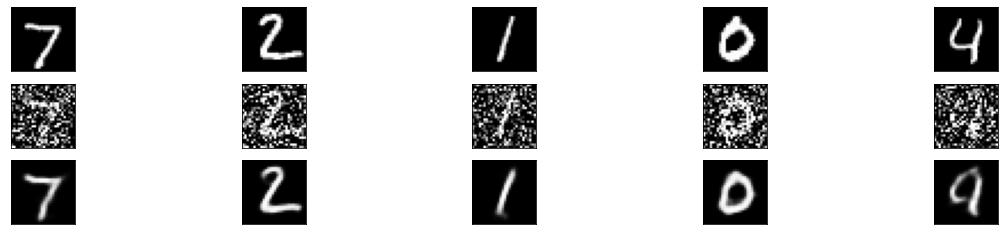

In [9]:
pred = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # oryginaly
    ax = plt.subplot(3, 5, i + 1+5)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # rekonstrukcje
    ax = plt.subplot(3, 5, i + 1 + 10)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

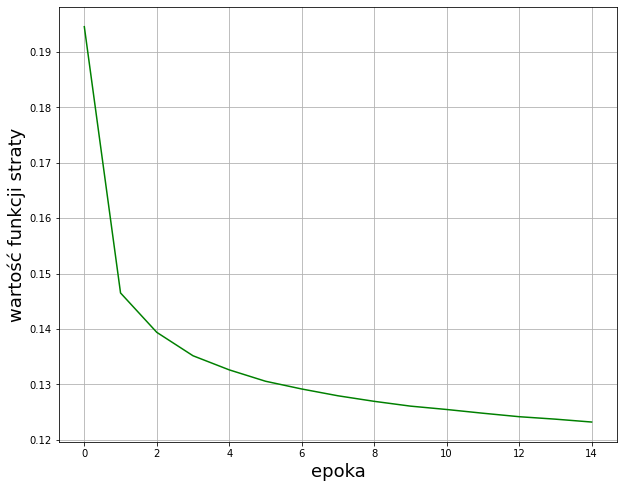

In [24]:
loss=history.history['loss']
epoch=history.epoch
fig = plt.figure(figsize=(10,8))
plt.plot(epoch, loss, 'g')
plt.ylabel("wartość funkcji straty", fontsize=18)
plt.xlabel("epoka", fontsize=18)
plt.grid(True)
plt.show()

In [8]:
autoencoder.save_weights('denoising_autoencoder.h5')